<a href="https://colab.research.google.com/github/incerasita/ADA/blob/main/Cleaning_and_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/sms_spam.csv')

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each text
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment score for each message in the DataFrame
df['vader_sentiment_rawtext'] = df['text'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
df[['text', 'vader_sentiment_rawtext']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


text  vader_sentiment_rawtext
0  Go until jurong point, crazy.. Available only ...                   0.6249
1                      Ok lar... Joking wif u oni...                   0.4767
2  Free entry in 2 a wkly comp to win FA Cup fina...                   0.7964
3  U dun say so early hor... U c already then say...                   0.0000
4  Nah I don't think he goes to usf, he lives aro...                  -0.1027

In [4]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    return ' '.join(tokens)


In [5]:
df['text1'] = df['text'].apply(preprocess_text)

In [6]:
df #text1 = cleaned data

type                                               text  \
0      ham  Go until jurong point, crazy.. Available only ...   
1      ham                      Ok lar... Joking wif u oni...   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3      ham  U dun say so early hor... U c already then say...   
4      ham  Nah I don't think he goes to usf, he lives aro...   
...    ...                                                ...   
5569  spam  This is the 2nd time we have tried 2 contact u...   
5570   ham              Will Ã¼ b going to esplanade fr home?   
5571   ham  Pity, * was in mood for that. So...any other s...   
5572   ham  The guy did some bitching but I acted like i'd...   
5573   ham                         Rofl. Its true to its name   

      vader_sentiment_rawtext  \
0                      0.6249   
1                      0.4767   
2                      0.7964   
3                      0.0000   
4                     -0.1027   
...                       ...   
5569                   0.8805   
5570                   0.0000   
5571                  -0.2960   
5572                   0.8934   
5573                   0.7579   

                                                  text1  
0     go jurong point crazy available bugis n great ...  
1                               ok lar joking wif u oni  
2     free entry wkly comp win fa cup final tkts may...  
3                   u dun say early hor u c already say  
4                nah think goes usf lives around though  
...                                                 ...  
5569  time tried contact u pound prize claim easy ca...  
5570                          b going esplanade fr home  
5571                              pity mood suggestions  
5572  guy bitching acted like interested buying some...  
5573                                     rofl true name  

[5574 rows x 4 columns]

In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each text
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to get sentiment score for each message in the DataFrame
df['vader_sentiment_cleantext'] = df['text1'].apply(get_sentiment)

# Display the first few rows to verify sentiment scores
df[['text', 'vader_sentiment_cleantext']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

   vader_sentiment_cleantext  
0                     0.4019  
1                     0.4767  
2                     0.7964  
3                     0.0000  
4                    -0.1027

In [8]:
df[['vader_sentiment_rawtext', 'vader_sentiment_cleantext']]

#some are the same, some are not
#argument for raw text = raw meaning expression
#argument for cleanedtext =
#when cleaning, stopword remove neg. word

vader_sentiment_rawtext  vader_sentiment_cleantext
0                      0.6249                     0.4019
1                      0.4767                     0.4767
2                      0.7964                     0.7964
3                      0.0000                     0.0000
4                     -0.1027                    -0.1027
...                       ...                        ...
5569                   0.8805                     0.7351
5570                   0.0000                     0.0000
5571                  -0.2960                    -0.2960
5572                   0.8934                     0.7506
5573                   0.7579                     0.7579

[5574 rows x 2 columns]

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

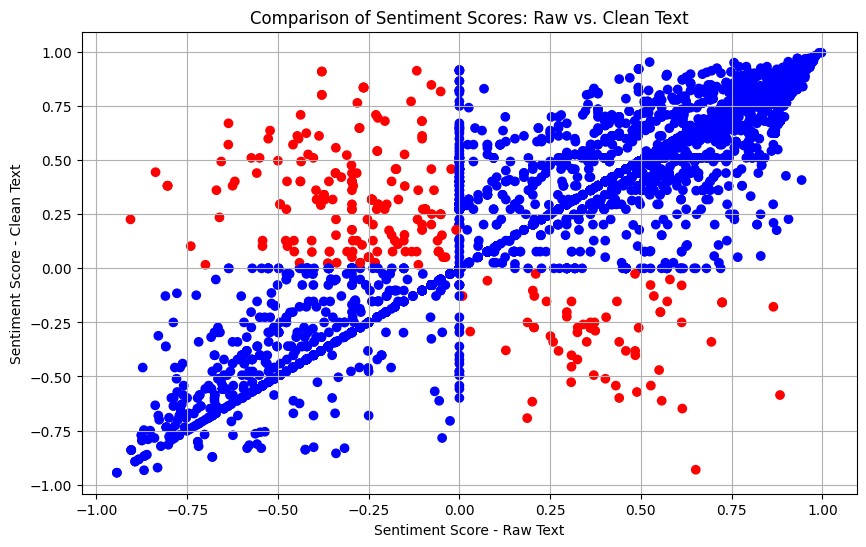

In [10]:
# Create a color list based on condition
colors = ['red' if (x < 0 and y > 0) or (x > 0 and y < 0) else 'blue' for x, y in zip(df['vader_sentiment_rawtext'], df['vader_sentiment_cleantext'])]

plt.figure(figsize=(10, 6))

# Plotting using matplotlib directly
plt.scatter(df['vader_sentiment_rawtext'], df['vader_sentiment_cleantext'], c=colors)

# Customizing the plot
plt.title('Comparison of Sentiment Scores: Raw vs. Clean Text')
plt.xlabel('Sentiment Score - Raw Text')
plt.ylabel('Sentiment Score - Clean Text')
plt.grid(True)
plt.show()


In [11]:
# Calculate the mean of the columns
print(df['vader_sentiment_rawtext'].mean())
print(df['vader_sentiment_cleantext'].mean())

0.19061661284535344
0.21982475780409044


In [12]:
# Calculate the standard deviation of the columns
print(df['vader_sentiment_rawtext'].std())
print(df['vader_sentiment_cleantext'].std())

0.416131003076066
0.3932765030747478
